# PRUEBA DS GASES-HT

- Importamos las librerías necesarias:

In [130]:
import os
import pandas as pd
import torch
import torchaudio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import altair as alt
import plotly.graph_objs as go
import re
import calendar
import seaborn as sns
from pandas.plotting import parallel_coordinates

## Análisis exploratorio de los datos (EDA)

Realizamos la importación de los datos:

In [131]:
DATOS=pd.read_csv(r"C:\Users\ANGIE VANESA\PROYECTOS\Prueba_Gases\data.csv")
DATOS.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO
0,1/1/2021,1068535,ATLANTICO,RESIDENCIAL,0,REAL
1,1/1/2021,1095302,ATLANTICO,COMERCIAL,21,REAL
2,1/1/2021,1131454,ATLANTICO,RESIDENCIAL,0,REAL
3,1/1/2021,1134487,ATLANTICO,COMERCIAL,132,REAL
4,1/1/2021,1140821,ATLANTICO,RESIDENCIAL,0,REAL


### Verificación de datos faltantes:

Vemos que los datos no tienen registros faltantes:

In [132]:
datos_faltantes=DATOS.isnull().sum()
datos_faltantes

PERIODO          0
ID CLIENTE       0
DEPARTAMENTO     0
CLASIFICACION    0
CONSUMO          0
TIPO CONSUMO     0
dtype: int64

In [133]:
DATOS.shape

(312, 6)

La data está conformada por 312 registros y 6 columnas, cuyos nombres son:

In [134]:
DATOS.columns

Index(['PERIODO', 'ID CLIENTE', 'DEPARTAMENTO', 'CLASIFICACION', 'CONSUMO',
       'TIPO CONSUMO'],
      dtype='object')

### Variables

En los datos se tienen 6 variables: 

- Periodo: las fechas de registro de consumo mensual. 

- ID cliente: Código de identificación del cliente.

- Departamento: Territorio nacional donde se encuentra ubicado el cliente.

- Clasificación: Etiqueta asignada para categorizar al cliente según el tipo de cliente o el uso que se le da al consumo registrado.

- Consumo: Registro del consumo mensual de cada cliente.

- Tipo de consumo: Esta variable nos indica si el registro de consumo de los clientes fue real o estimado 


#### Análisis descriptivo univariado

Los datos corresponde al registro del consumo mensual de una lista de clientes, identificados con un código o ID diferente. Se realizó un filtro para identificar cuántos clientes se encuentran en la muestra obteniéndose:

In [135]:
DATOS['ID CLIENTE'].unique()

array([ 1068535,  1095302,  1131454,  1134487,  1140821,  1999658,
        2058257,  2076530,  2084470,  6089526,  6111795,  8091803,
        8092746, 17067567, 17186468, 50002330, 50043502, 50071540,
       50095570, 50157457, 50599279, 50689487, 51030818, 51390294,
       51577033, 51639236], dtype=int64)

In [136]:
len(DATOS['ID CLIENTE'].unique())

26

En total son 26 clientes, a los cuales se les hizo un registro mensual de su consumo. A continuación se realizará un análisis descriptivo de los clientes:

In [137]:
datos=DATOS[['ID CLIENTE', 'DEPARTAMENTO','CLASIFICACION']].drop_duplicates()
datos.head()

,ID CLIENTE,DEPARTAMENTO,CLASIFICACION
0,1068535,ATLANTICO,RESIDENCIAL
1,1095302,ATLANTICO,COMERCIAL
2,1131454,ATLANTICO,RESIDENCIAL
3,1134487,ATLANTICO,COMERCIAL
4,1140821,ATLANTICO,RESIDENCIAL


#### Departamento

In [138]:
pd.DataFrame(datos['DEPARTAMENTO'].describe(include=object)).T

,count,unique,top,freq
DEPARTAMENTO,26,2,ATLANTICO,19


Podemos ver que la variable ***Departamento*** es categórica  y tiene dos niveles, uno  es **Atlantico** el cual tiene mayor frecuencia, representando aproximadamente el 73% de los clientes registrados. A continuación un diagrama de barras: 

In [139]:
fig=px.bar(datos['DEPARTAMENTO'].value_counts().sort_index(),
           x=datos['DEPARTAMENTO'].value_counts().index,
           y=datos['DEPARTAMENTO'].value_counts().values,
           labels={'x':'Departamento', 'y':'Frecuencia'},
           title='Departamento: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Departamento',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600)
fig.show()

Hay 7 registros de la categoría ***Magdalena*** en los datos, representando un 26,9%. Vemos que de los 26 clientes, gran parte son del departamento del Atlántico.

#### Clasificación

In [140]:
pd.DataFrame(datos['CLASIFICACION'].describe(include=object)).T

,count,unique,top,freq
CLASIFICACION,26,3,RESIDENCIAL,15


La variable ***Clasificacion*** tiene 3 niveles o categorías, siendo la categoría **Residencial** la más frecuente; se tiene en total 15 clientes con esta categoría, representando un 57,6% del total.

In [141]:
fig=px.bar(datos['CLASIFICACION'].value_counts().sort_index(),
           x=datos['CLASIFICACION'].value_counts().index,
           y=datos['CLASIFICACION'].value_counts().values,
           labels={'x':'Clasificación', 'y':'Frecuencia'},
           title='Clasificación: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Clasificación',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600).show()

El diagrama de barras anterior nos muestra la frecuencia de cada categoría en la variable ***Clasificacion***. La segunda categoría es **Comercial** con 6 registros, mientras que la categoría **Industrial** cuenta con 5 registros. Vemos que los clientes se encuentran categorizados, y la mayoría de estos son parte del sector residencial.

#### Tipo de consumo

In [142]:
DATOS['TIPO CONSUMO'].unique()

array(['REAL', 'ESTIMADO'], dtype=object)

La variable ***Tipo consumo*** también es categórica, con dos categorías: 

- REAL

- ESTIMADO

- Tipo de consumo en el año:

Los datos entregan información sobre el tipo de consumo mensual en cada cliente durante el año 2021:

In [143]:
fig=px.bar(DATOS['TIPO CONSUMO'].value_counts().sort_index(),
           x=DATOS['TIPO CONSUMO'].value_counts().index,
           y=DATOS['TIPO CONSUMO'].value_counts().values,
           labels={'x':'Tipo de consumo', 'y':'Frecuencia'},
           title='Tipo de consumo: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Tipo de consumo',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600).show()

El diagrama de barras anterior nos muestra que la categoría **Real** es la que más registros tuvo en la muestra. **Estimado** es la segunda categoría de esta variable, con una pequeña proporción de registros, menos del 3%. Gran parte de los clientes en la muestra contaron con un registro de consumo "real" durante el año 2021
.

- Tipo de consumo por periodo

In [144]:
DATOS['PERIODO'] = pd.to_datetime(DATOS['PERIODO'])
DATOS['MES'] = DATOS['PERIODO'].dt.strftime('%B')
meses_ord= ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
Tipo_consumo=DATOS[['MES','TIPO CONSUMO']]
Tipo_consumo['MES'] = pd.Categorical(Tipo_consumo['MES'], categories=meses_ord, ordered=True)
Tipo_consumo=Tipo_consumo.groupby(['MES','TIPO CONSUMO']).size().reset_index(name='count')
Tipo_consumo.head()

,MES,TIPO CONSUMO,count
0,January,ESTIMADO,0
1,January,REAL,26
2,February,ESTIMADO,0
3,February,REAL,26
4,March,ESTIMADO,0


In [145]:
fig=px.bar(Tipo_consumo, x='MES', y='count', color='TIPO CONSUMO',
           labels={'count':'Frecuencia','TIPO CONSUMO':'Tipo de consumo','MES':'Meses'},
           title='Tipo de consumo por mes: Frecuencia',
           color_discrete_sequence=px.colors.qualitative.Set2).update_layout(yaxis=dict(dtick=5),barmode='group', 
                                                              height=500,
                                                              width=600).show()

El diagrama de barras anterior nos muestra que los primeros tres meses del año , mayo y diciembre, los 26 clientes registraron un tipo de consumo **real**, mientras que hubo meses donde algunos clientes tuvieron un tipo de consumo **estimado** (*En verde*)

#### Consumo

- Consumo anual en la muestra:

El siguiente resumen corresponde a un análisis descriptivo de la variable numérica consumo:

In [146]:
pd.DataFrame(DATOS['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,312.0,1226.971154,3234.101606,-75.0,11.0,20.0,353.75,23748.0


- El registro de consumo promedio en el año 2021 fue de 1226,97 con una desviación estándar de 3234.10; esta desviación nos indica una gran variabilidad en los datos.

- El valor mínimo de consumo registrado es -75, este dato al ser negativo es candidato a ser un dato atípico, ya que la variable consumo debería ser positiva.

- El valor máximo registrado fue 23.748 el cual es bastante elevado comparado con los otros registros, esto teniendo en cuenta que un 75% de los registros es inferior a 353.75. Se validará si es un posible dato atípico. 

- El 50% del consumo anual fue menor o igual a 20. Dado que la mediana de los datos es muy inferior a la media, es decir, la distribución de los datos está sesgada hacia la derecha, como puede verse en el siguiente gráfico:


In [147]:
fig=px.histogram(DATOS, x='CONSUMO', nbins=30, title='Consumo: Histograma', 
                 labels={"value":"Consumo", "count":"Frecuencia"}, color_discrete_sequence=['#17becf']).update_layout(height=400,width=500).show()

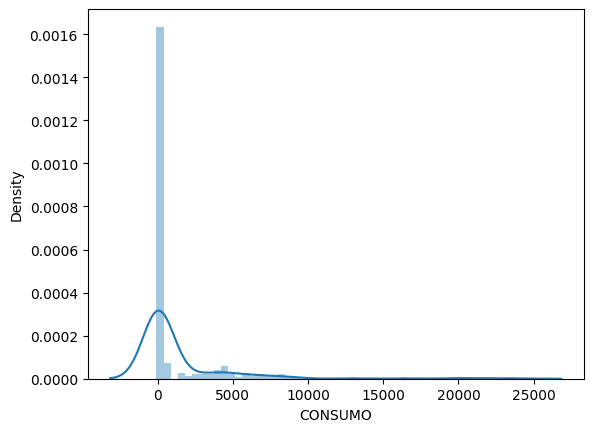

In [148]:
sns.distplot(DATOS.CONSUMO);

El gráfico anterior nos muestra como la gran parte de los datos se acumulan a la izquierda.

- Consumo mensual por cliente

In [149]:
DATOS['MES_NUM'] = DATOS['PERIODO'].dt.month
DATOS=pd.DataFrame(DATOS)
DATOS.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO,MES,MES_NUM
0,2021-01-01,1068535,ATLANTICO,RESIDENCIAL,0,REAL,January,1
1,2021-01-01,1095302,ATLANTICO,COMERCIAL,21,REAL,January,1
2,2021-01-01,1131454,ATLANTICO,RESIDENCIAL,0,REAL,January,1
3,2021-01-01,1134487,ATLANTICO,COMERCIAL,132,REAL,January,1
4,2021-01-01,1140821,ATLANTICO,RESIDENCIAL,0,REAL,January,1


- Consumo por clasificación

***Residencial***

In [166]:
consumo_residencial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='RESIDENCIAL']
pd.DataFrame(consumo_residencial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,180.0,12.094444,7.5485,0.0,9.0,13.0,18.0,32.0


Los clientes del sector residencial tienen un consumo anual promedio de 12,09 con una desviación estándar de 7.54. El siguiente gráfico es un diagrama de cajas donde podemos visualizar los quintiles, se observa la presencia de un posible dato atípico

In [155]:
fig = px.box(consumo_residencial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

***Industrial***

In [167]:
consumo_industrial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='INDUSTRIAL']
pd.DataFrame(consumo_industrial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,60.0,6128.466667,4982.196485,78.0,3522.25,4597.0,7042.0,23748.0


Los clientes del sector industrial tiene un consumo promedio anual de 6128.46 con una desviación de 4982.19. El consumo mínimo registrado fue de 78, mientras que el consumo máximo registrado fue de 23748. El siguiente boxplot nos muestra posibles datos atípicos.

In [156]:
fig = px.box(consumo_industrial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

***Comercial***

In [168]:
consumo_comercial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='COMERCIAL']
pd.DataFrame(consumo_comercial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,72.0,179.583333,176.869392,-75.0,33.5,112.0,360.5,582.0


Los clientes del sector comercial tiene un consumo promedio anual de 179.58 con una desviación de 176.86 . se identifica un registro negativo que probablemente sea un dato atípico, ya que el consumo no puede ser negativo

In [158]:
fig = px.box(consumo_comercial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

- Consumo por mes según tipo de clasificación

***Residencial: Consumo Mensual***

In [192]:
fig = px.box(consumo_residencial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Residencial: Consumo Mensual',
                                                                                height=400, width=600).show()

***Industrial: Consumo mensual***

In [191]:
fig = px.box(consumo_industrial, x='MES', y='CONSUMO', color='MES').update_layout(showlegend=False,
                                                                                  title='Industrial: Consumo Mensual',
                                                                                  height=400, width=600).show()

***Comercial: Consumo mensual***

In [193]:
fig = px.box(consumo_comercial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Comercial: Consumo Mensual',
                                                                                height=400, width=600).show()